# Imports

In [1]:
import plotnine as gg
gg.theme_set(gg.theme_classic)
import numpy as np
import os
import pandas as pd

from Functions import get_info_from_fullID

# Directories

In [2]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/mice/')
plot_save_dir = os.path.join(base_dir, 'models/plots/')

# Plot model fits

In [3]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits = model_fits.sort_values(by=['WAIC']).reset_index(drop=True)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,AIC
0,Bbspr,age_z,440,197248.390625,96864.195312,197248.390625
1,RLabcpnxd,age_z,440,199314.156250,96577.078125,199314.156250
2,RLabnp2d,age_z,440,199711.000000,97215.500000,199711.000000
3,Bbpr,age_z,440,201298.031250,99329.015625,201298.031250
4,RLabnp2,age_z,441,201969.906250,98779.953125,201969.906250
5,RLabcpnd,age_z,440,204218.984375,99469.492188,204218.984375
6,RLabcpd,age_z,440,204478.062500,100039.031250,204478.062500
7,RLabcd,age_z,440,210260.765625,103370.382812,210260.765625
8,Bbp,age_z,440,212944.000000,105592.000000,212944.000000
9,RLabd,age_z,440,220771.937500,109065.968750,220771.937500


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/WAICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


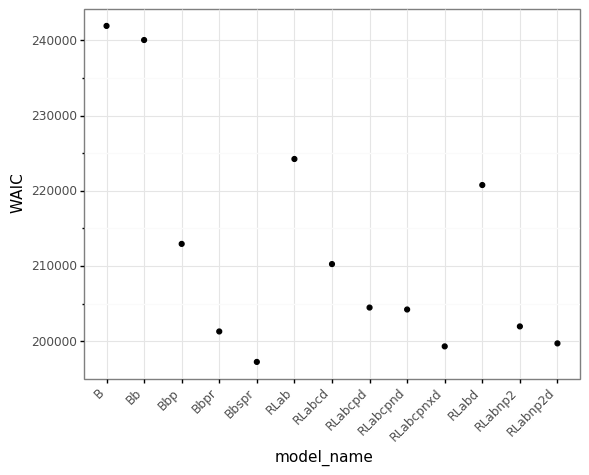

<ggplot: (129701116750)>

In [7]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'WAIC'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)
g.save(os.path.join(plot_save_dir, 'WAICs.png'))
g

In [8]:
# winning_model_name = model_fits[model_fits.WAIC == np.min(model_fits.WAIC)].model_name.values[0]
winning_model_names = ['Bbspr', 'RLabcpnxd']

In [17]:
fits = pd.read_csv(os.path.join(param_dir, 'plots', 'subjwise_LLs.csv'))
fits = fits.drop(columns=['slope_variable', 'n_subj'])
fits

,model_name,n_params,1404012,1404112,1404212,1404312,1404412,1404512,1404612,1404712,...,1307921,1308021,1308121,1308221,1308321,1308521,1308621,1308821,1308921,1309021
0,Bbpr,3,-179.044937,-246.233154,-272.551941,-170.055161,-206.303986,-224.175369,-211.782455,-184.107864,...,-160.980789,-248.316467,-192.486618,-204.300858,-251.533997,-205.608536,-202.348862,-196.624786,-191.656067,-182.175583
1,Bbp,2,-186.931244,-265.237671,-296.356140,-210.346817,-213.423981,-240.261185,-237.775681,-200.148270,...,-172.986969,-272.413208,-208.253342,-224.581772,-253.064423,-233.403229,-218.973801,-221.516937,-205.833466,-200.176224
2,Bbspr,4,-177.458374,-243.053085,-281.218140,-168.632568,-202.039566,-228.628265,-207.171814,-178.566528,...,-158.803467,-249.304703,-188.766495,-199.423462,-243.207718,-201.661987,-201.484314,-195.043320,-177.473984,-171.475555
3,Bb,1,-270.396240,-336.897705,-333.587250,-250.425461,-242.417831,-250.872437,-254.403915,-231.669418,...,-239.102173,-294.276001,-237.312729,-242.318329,-265.999969,-251.830231,-245.618057,-238.360214,-214.517593,-197.162247
4,B,0,-263.531647,-347.559540,-358.032867,-236.662109,-220.353943,-250.690704,-246.013626,-227.652283,...,-229.291473,-290.548553,-226.521332,-231.385071,-261.702393,-238.873337,-233.356308,-231.040405,-204.012955,-190.961258
5,RLabcd,4,-219.873947,-274.442322,-296.426117,-175.983856,-198.276337,-232.279144,-229.671127,-201.733627,...,-173.239578,-272.174805,-195.573013,-200.761215,-249.100342,-213.686752,-204.917633,-201.778442,-175.665115,-178.991699
6,RLabcpd,5,-194.481171,-250.935257,-284.006714,-173.885498,-208.577591,-230.141327,-222.522141,-196.394485,...,-166.344696,-266.294739,-193.592453,-196.669708,-252.370255,-213.172333,-203.193054,-205.119324,-169.556290,-171.997665
7,RLabcpnd,6,-191.891449,-250.068710,-287.278168,-172.411423,-207.537338,-229.682816,-219.936783,-195.706680,...,-165.988815,-262.268158,-193.511185,-196.806900,-242.470978,-212.295685,-203.131714,-203.777328,-164.092300,-176.303635
8,RLabcpnxd,7,-178.495331,-238.020523,-259.629486,-168.140976,-197.926880,-215.259903,-213.671036,-183.582932,...,-157.393570,-251.021378,-188.710892,-193.770401,-240.097107,-207.376923,-201.148911,-189.539017,-171.550735,-158.013626
9,RLabd,3,-231.364029,-316.169373,-300.063751,-184.544373,-206.720520,-242.181412,-234.464676,-204.021423,...,-192.605164,-275.820831,-221.775543,-227.330933,-275.494415,-226.055954,-210.127411,-242.923660,-196.560928,-196.209183


In [18]:
# Melt
fits_ = pd.melt(fits, id_vars=['model_name', 'n_params'], var_name='fullID', value_name='LL')

# Add BIC and AIC
n_trials = 725
for row in range(len(fits_)):
    fits_.loc[row, 'AIC'] = 2 * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']
    fits_.loc[row, 'BIC'] = np.log(n_trials) * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']

# Add animal id, age, gender
keys = get_info_from_fullID(fits_.fullID[0]).keys()
for row in range(len(fits_)):
    for key in keys:
        fits_.loc[row, key] = get_info_from_fullID(fits_.fullID[row])[key]
fits_

,model_name,n_params,fullID,LL,AIC,BIC,animal,age,gender,agegroup
0,Bbpr,3,1404012,-179.044937,364.089874,377.848389,14.0,40.0,Male,Juvenile
1,Bbp,2,1404012,-186.931244,377.862488,387.034831,14.0,40.0,Male,Juvenile
2,Bbspr,4,1404012,-177.458374,362.916748,381.261435,14.0,40.0,Male,Juvenile
3,Bb,1,1404012,-270.396240,542.792480,547.378652,14.0,40.0,Male,Juvenile
4,B,0,1404012,-263.531647,527.063293,527.063293,14.0,40.0,Male,Juvenile
...,...,...,...,...,...,...,...,...,...,...
5728,RLabcpnxd,7,1309021,-158.013626,330.027252,362.130454,13.0,90.0,Female,Adult
5729,RLabd,3,1309021,-196.209183,398.418365,412.176880,13.0,90.0,Female,Adult
5730,RLabnp2d,6,1309021,-157.664307,327.328613,354.845643,13.0,90.0,Female,Adult
5731,RLabnp2,5,1309021,-170.809143,351.618286,374.549144,13.0,90.0,Female,Adult


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/LLs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/BICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages

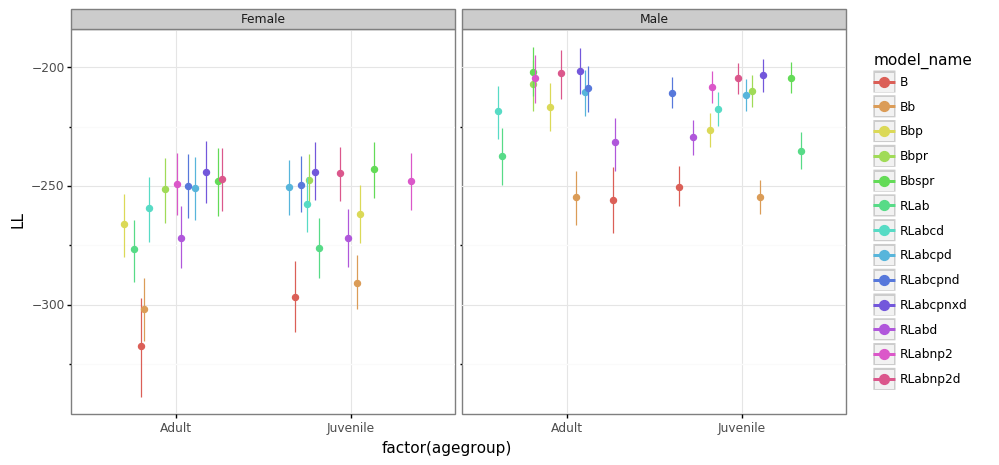

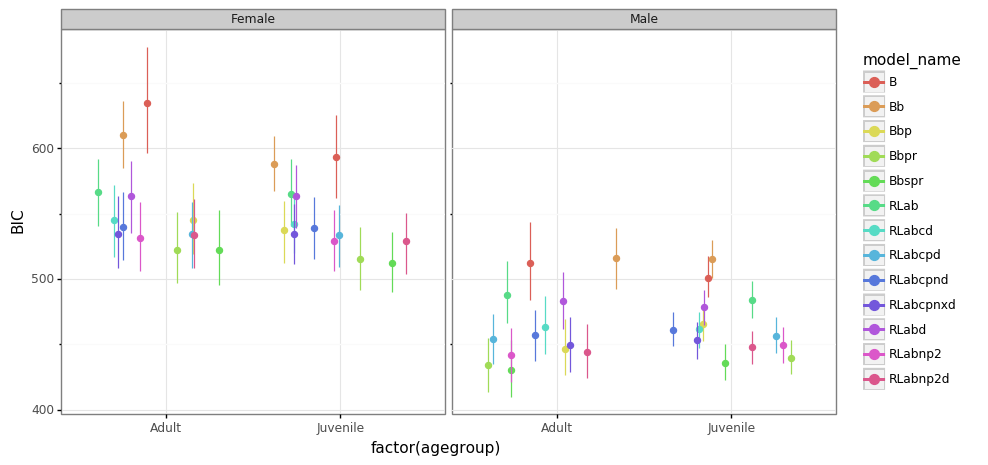

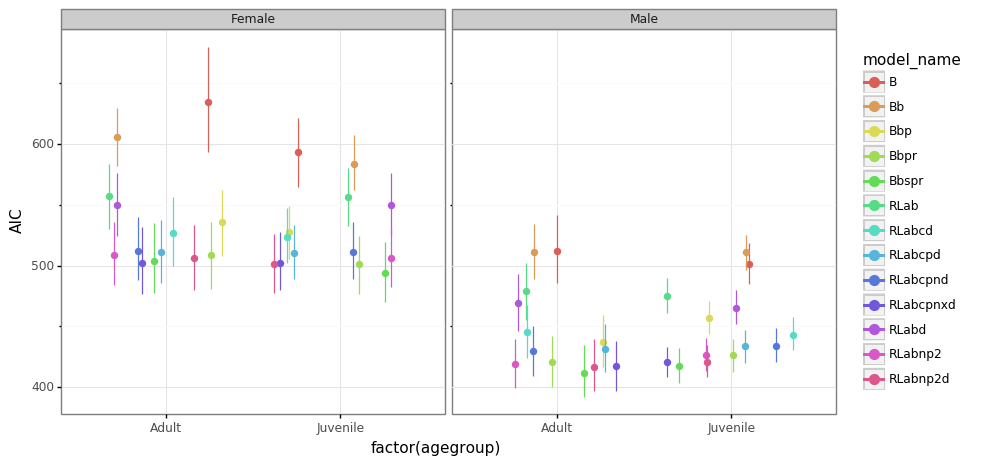

In [19]:
for yax in ['LL', 'BIC', 'AIC']:
    g = (gg.ggplot(fits_, gg.aes('factor(agegroup)', yax, color='model_name'))
     + gg.stat_summary(position='jitter')
     + gg.facet_wrap('~ gender')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, '{}s.png'.format(yax)))

In [20]:
# Get AICs
AICs = fits_.pivot_table(columns='model_name', index=['fullID', 'gender', 'agegroup'], values='AIC')

for col in AICs.columns:
    if 'RL' in col:
        ref_col = 'RLabcpnxd'
    elif 'B' in col:
        ref_col = 'Bbspr'
    if 'WSLS' in col:
        ref_col = 'Bbspr'
    AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]
ref_col, col = winning_model_names
AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]

# AIC differences
AICs_rel = AICs.drop(columns=[col for col in AICs.columns if
                              (not 'minus' in col) and (not col=='gender') and (not col=='agegroup')])
AICs_rel = AICs_rel.reset_index()
AICs_rel = AICs_rel.melt(id_vars=['fullID', 'gender', 'agegroup'], value_name='AIC')
AICs_rel

,fullID,gender,agegroup,model_name,AIC
0,1007421,Female,Adult,B_minus_Bbspr,454.298279
1,1007521,Female,Adult,B_minus_Bbspr,272.092438
2,1007621,Female,Adult,B_minus_Bbspr,239.632324
3,1007721,Female,Adult,B_minus_Bbspr,134.209381
4,1007821,Female,Adult,B_minus_Bbspr,157.481964
...,...,...,...,...,...
6169,908421,Female,Adult,RLabcpnxd_minus_Bbspr,10.201935
6170,908521,Female,Adult,RLabcpnxd_minus_Bbspr,15.285278
6171,908621,Female,Adult,RLabcpnxd_minus_Bbspr,5.821686
6172,908721,Female,Adult,RLabcpnxd_minus_Bbspr,37.735657


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/RelativeAICs2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


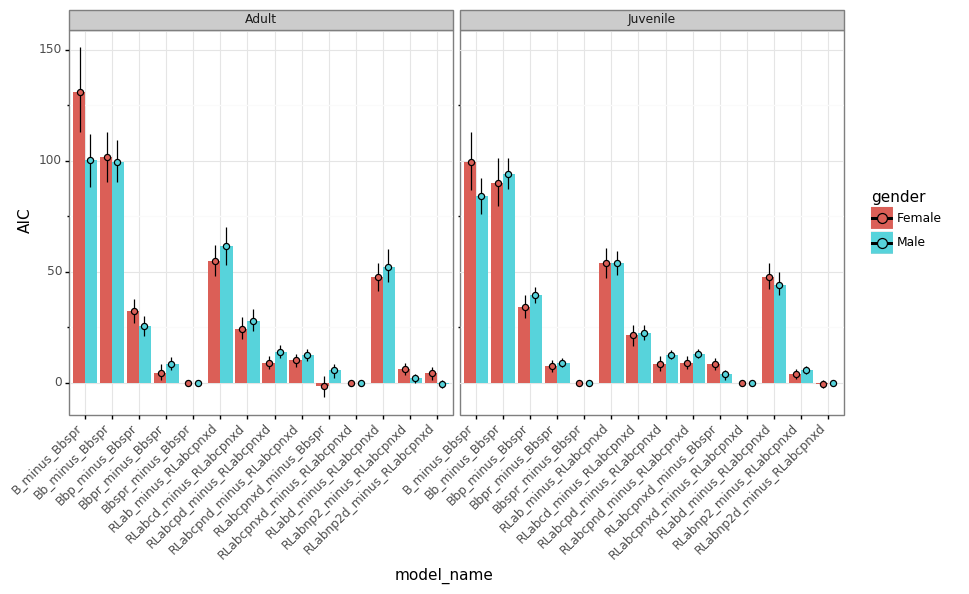

In [21]:
# Plot AIC differences
gg.options.figure_size = (10, 5)
g = (gg.ggplot(AICs_rel, gg.aes('model_name', 'AIC', fill='gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(position=gg.position_dodge(width=0.75))
#  + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
 + gg.facet_grid('~ agegroup')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'RelativeAICs2.png'))

# Load fitted parameters

In [ ]:
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    if ('csv' in file) and ('nll' not in file):
        new_params = pd.read_csv(os.path.join(param_dir, file))
        all_params = all_params.append(new_params)
all_params.beta /= 15
all_params['age_group'] = ['adult' if treatment == 1 else 'juvenile' for treatment in all_params.treatment]
all_params

In [ ]:
parameter_colnames = ['alpha', 'beta', 'calpha', 'cnalpha', 'm', 'nalpha', 'persev']
animal_colnames = ['Gender', 'PDS', 'PreciseYrs', 'T1', 'age_z', 'animal', 'fullID', 'sID', 'session', 'treatment', 'age_group']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model', 'slope_variable'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
all_params_long

# Plotting functions

In [ ]:
def plot_session_params(data, winning_model_name):

    g = (gg.ggplot(data, gg.aes('session', 'param_value', color='age_group'))
     + gg.geom_point(alpha=0.5)
     + gg.theme_bw()
     + gg.geom_smooth()
     + gg.coord_cartesian(xlim=(0, 12))
     + gg.facet_grid('model~param_name')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, 'ParamsSession_{}.png'.format(winning_model_name)))

In [ ]:
def plot_agegroup_params(data, winning_model_name):

    g = (gg.ggplot(data,
               gg.aes('age_group', 'param_value', fill='Gender'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge)
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
     + gg.theme_bw()
     + gg.facet_grid('model~param_name')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, 'ParamsAgegroup_{}.png'.format(winning_model_name)))

In [ ]:
def plot_age_params(data, winning_model_name, file_name_sub=''):

    g = (gg.ggplot(data, gg.aes('PreciseYrs', 'param_value', color='Gender'))
     + gg.geom_point()
     + gg.theme_bw()
     + gg.geom_smooth()
     + gg.facet_grid('model~param_name')
     + gg.labs(x='Age')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, 'ParamsAge_{}{}.png'.format(winning_model_name, file_name_sub)))

# Plot winning models

In [ ]:
for winning_model_name in winning_model_names:

    # Subset model data
    win_mod_sub = all_params_long.model == winning_model_name
    not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
    sub_dat = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]
    
    # Plot
    gg.options.figure_size = (5, 4)
    plot_session_params(sub_dat, winning_model_name)
    plot_agegroup_params(sub_dat, winning_model_name)
    plot_age_params(sub_dat, winning_model_name)
    plot_age_params(sub_dat[sub_dat.session == 0], winning_model_name, 'session0')

# Parameter correlations between models

# Plot all models

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAge.png'))

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsSession.png'))

In [ ]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAgegroup.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession2.png'))

# Gen Rec

## WSLS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)